# Filtering and Scipy.Signal

Demonstration of FIR filtering using scipy.signal.  Part of a lecture given in ELEG 306 Digital Signal Processing, Oct 6, 2014.

Charles Boncelet, boncelet@udel.edu

In [1]:
%pylab inline
import scipy.signal as sig

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = randn(1200)

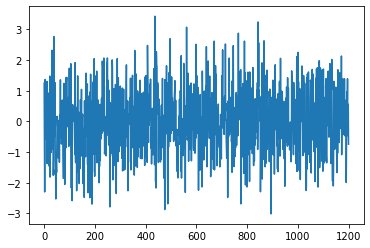

In [3]:
plot(x)

## Low Pass filter

In [4]:
sig.firwin?

Signature:
sig.firwin(
    numtaps,
    cutoff,
    width=None,
    window='hamming',
    pass_zero=True,
    scale=True,
    nyq=None,
    fs=None,
)
Docstring:
FIR filter design using the window method.

This function computes the coefficients of a finite impulse response
filter. The filter will have linear phase; it will be Type I if
`numtaps` is odd and Type II if `numtaps` is even.

Type II filters always have zero response at the Nyquist frequency, so a
ValueError exception is raised if firwin is called with `numtaps` even and
having a passband whose right end is at the Nyquist frequency.

Parameters
----------
numtaps : int
    Length of the filter (number of coefficients, i.e. the filter
    order + 1).  `numtaps` must be odd if a passband includes the
    Nyquist frequency.
cutoff : float or 1-D array_like
    Cutoff frequency of filter (expressed in the same units as `fs`)
    OR an array of cutoff frequencies (that is, band edges). In the
    latter case, the frequencies in 

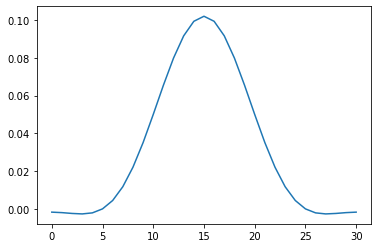

In [5]:
h = sig.firwin(31,0.1)
plot(h)

The connected dots plot above isn't as informative as the stem plot below:

<StemContainer object of 3 artists>

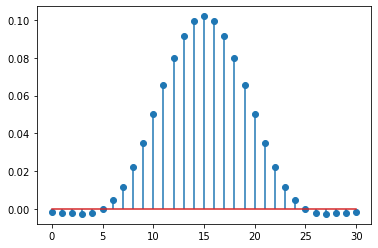

In [6]:
stem(range(len(h)),h)

Below we plot the magnitude response of the filter versus frequency (only versus positive frequencies--the negative half is the mirror image).

Notice, this is a linear phase filter whose sidelobes are about 120 dB below the passband.  Try building an analog filter like this!

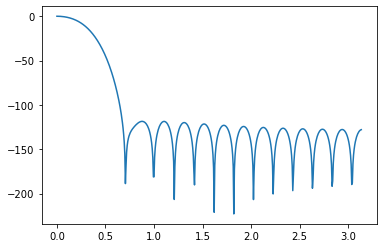

In [7]:
w, v = sig.freqz(h)
plot(w,20*log(abs(v)))

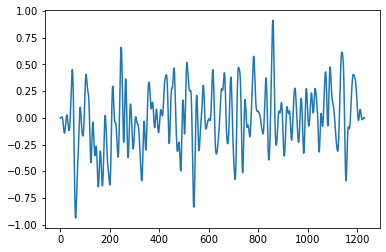

In [8]:
y=convolve(x,h)
plot(y)

Below, we tighten the filter to have a passband of 0.01$\pi$ wide (ok, as well as we can do with 51 taps--more taps results in a response closer to ideal at the expense of more delay and more computation).

<StemContainer object of 3 artists>

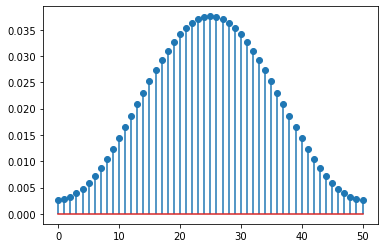

In [9]:
h2 = sig.firwin(51,0.01)
stem(range(len(h2)),h2)

Notice how the signal is much smoother now.  This is clearer in the scatter plot below.

One easily missed point:  The y-axis autoscales, resulting in plots of about the same "visual magnitude".  But look carefully: the original plot of x has a scale from -4 to 4 while this one goes from about -0.4 to 0.4.  The signal has gotten much smaller.  Why?  Because the filter has removed about 99% of the energy!

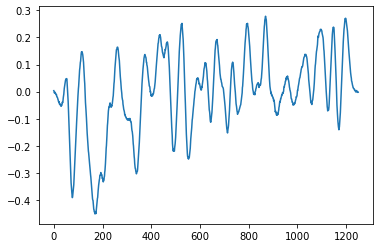

In [10]:
y2 = convolve(x,h2)
plot(y2)

Show the dots. Notice how close consecutive dots are to each other.  Also, notice how the dots have "momentum".  This is a characteristic of a low pass signal like this.

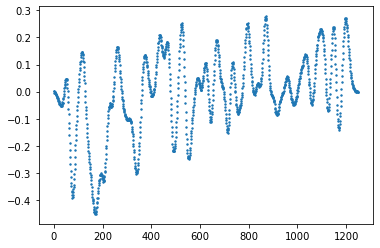

In [11]:
scatter(range(len(y2)),y2,s=2)

## Bandpass Filter

Notice how the bandpass filter's impulse response matches the intended signal.  It oscillates slowly between positive and negative values, much like a sinusoid of frequency 0.15$\pi$ does.

<StemContainer object of 3 artists>

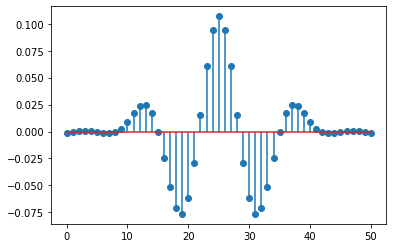

In [12]:
hbp = sig.firwin(51, [0.1,0.2], pass_zero=False)
stem(range(len(hbp)),hbp)

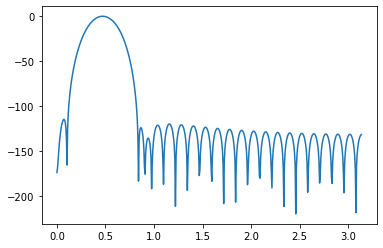

In [13]:
w, v = sig.freqz(hbp)
plot(w, 20*log(abs(v)))

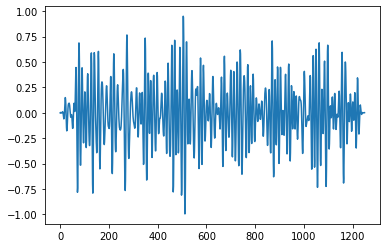

In [14]:
ybp = convolve(x,hbp)
plot(ybp)

<StemContainer object of 3 artists>

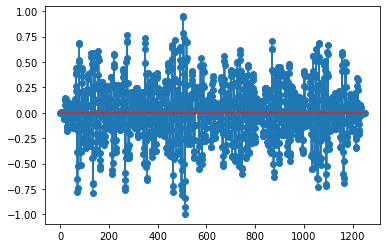

In [15]:
stem(range(len(ybp)),ybp)

This plot is a total mess.  It has too many points and the dots are too large.  Let's fix both:

<StemContainer object of 3 artists>

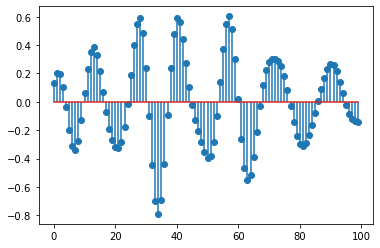

In [16]:
segment = ybp[100:200]
stem(range(len(segment)),segment)

Now we can see what happened.  The signal looks like a sinusoid, oscillating slowly between positive and negative values.  It isn't a perfect sinusoid for two reasons: 1) the signal is random (we starting with white Gaussian noise) and 2) the output has components at all frequencies within (and near) the passband.  

## High Pass Filter

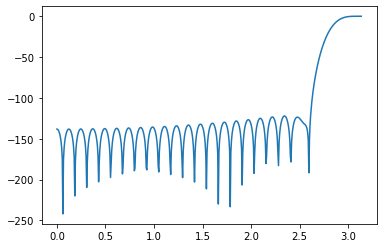

In [17]:
hhp = sig.firwin(51, 0.9, pass_zero=False)
w, v = sig.freqz(hhp)
plot(w, 20*log(abs(v)))

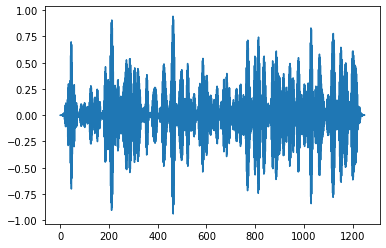

In [18]:
yhp = convolve(x,hhp)
plot(yhp)

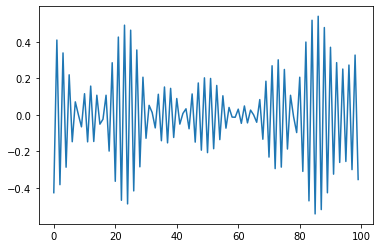

In [19]:
plot(yhp[500:600])

<StemContainer object of 3 artists>

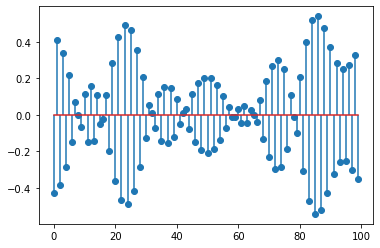

In [20]:
stem(yhp[500:600])

## Pole-Zero Plots

Let's do some pole-zero plots.  Since the filters have no poles, we only have to worry about the zeros.

In [21]:
z, p, k = sig.tf2zpk(h,1)
z

array([ 1.53330017+0.j        , -0.99486419+0.10121875j,
       -0.99486419-0.10121875j, -0.95409239+0.29951247j,
       -0.95409239-0.29951247j, -0.87421228+0.48554391j,
       -0.87421228-0.48554391j, -0.75848152+0.65169455j,
       -0.75848152-0.65169455j, -0.61161532+0.7911553j ,
       -0.61161532-0.7911553j , -0.43958666+0.89820018j,
       -0.43958666-0.89820018j, -0.24936678+0.96840911j,
       -0.24936678-0.96840911j, -0.04860325+0.99881816j,
       -0.04860325-0.99881816j,  0.15479768+0.98794619j,
        0.15479768-0.98794619j,  0.35338136+0.93547935j,
        0.35338136-0.93547935j,  0.81062009+0.77712424j,
        0.81062009-0.77712424j,  0.542754  +0.83989172j,
        0.542754  -0.83989172j,  0.76018662+0.64970478j,
        0.76018662-0.64970478j,  0.64282531+0.61626296j,
        0.64282531-0.61626296j,  0.65218802+0.j        ])

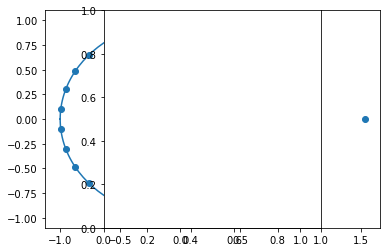

In [22]:
theta = linspace(-pi,pi,201)
plot(cos(theta),sin(theta))
fig = scatter(real(z),imag(z))
axes().set_aspect('equal')

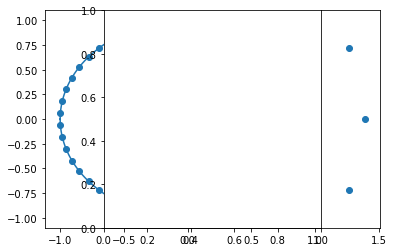

In [23]:
z, p, k = sig.tf2zpk(hbp,[1])
theta = linspace(-pi,pi,201)
plot(cos(theta),sin(theta))
fig = scatter(real(z),imag(z))
axes().set_aspect('equal')

Remember, zeros can be outside the unit circle without affecting stability.